In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
plt.style.use("ggplot")

In [2]:
import pandas as pd

try:
    xls = pd.ExcelFile("נתונים כמותיים.xlsx")
    weeks_df = pd.read_excel(xls, sheet_name='שבועות')
    stats_df = pd.read_excel(xls, sheet_name='ניתוח סטטסטי')
    months_df = pd.read_excel(xls, sheet_name='חודשים')
    print("All sheets loaded successfully.")
except Exception as e:
    print("Error loading the Excel file:", e)

All sheets loaded successfully.


In [3]:
weeks_df.set_index('שבוע')

,מתאריך,עד תאריך,כמות פ״מים,כמות שיבוצים,כמות אנשי צוות ששובצו,כמות אנשי צוות שלא שובצו בכלל,מינימום משימות לאיש צוות (ששובצו),מקס משימות לאיש צוות,זמן ממוצע של פ״מ,משך ממוצע לפיריט,כמות שיבוצים שגויים (כשירות),כמות שיבוצים שגויים (זמינות),"כמות שינוי שיבוץ שנבעו מבלת""מ",כמות שיבוצים שחרגו משעות מנוחה
שבוע,,,,,,,,,,,,,,
1,31.12.23,06.01.24,36,474,52,68,2,11,18.22,4.11,6,5,2,8
2,07.01.24,13.01.24,38,504,55,65,3,14,16.88,3.91,5,6,3,2
3,14.01.24,20.01.24,65,950,103,17,2,11,20.00,4.49,15,15,1,9
4,21.01.24,27.01.24,42,590,64,56,3,12,15.11,3.26,8,7,3,3
5,28.01.24,03.02.24,47,626,68,52,1,11,20.00,4.49,2,10,7,8
6,04.02.24,10.02.24,53,691,75,45,3,14,19.89,4.45,8,13,3,9
7,11.02.24,17.02.24,60,864,94,26,3,14,17.57,3.56,13,5,5,7
8,18.02.24,24.02.24,48,682,74,46,4,14,20.00,4.82,12,7,6,10
9,25.02.24,02.03.24,53,730,79,41,3,14,20.00,4.99,5,13,5,3


In [4]:
weeks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   שבוע                               52 non-null     int64  
 1   מתאריך                             52 non-null     object 
 2   עד תאריך                           52 non-null     object 
 3   כמות פ״מים                         52 non-null     int64  
 4   כמות שיבוצים                       52 non-null     int64  
 5   כמות אנשי צוות ששובצו              52 non-null     int64  
 6   כמות אנשי צוות שלא שובצו בכלל      52 non-null     int64  
 7   מינימום משימות לאיש צוות (ששובצו)  52 non-null     int64  
 8   מקס משימות לאיש צוות               52 non-null     int64  
 9   זמן ממוצע של פ״מ                   52 non-null     float64
 10  משך ממוצע לפיריט                   52 non-null     float64
 11  כמות שיבוצים שגויים (כשירות)       52 non-null     int64  
 

In [5]:
weeks_df.drop(columns='שבוע').describe().round(2)

,כמות פ״מים,כמות שיבוצים,כמות אנשי צוות ששובצו,כמות אנשי צוות שלא שובצו בכלל,מינימום משימות לאיש צוות (ששובצו),מקס משימות לאיש צוות,זמן ממוצע של פ״מ,משך ממוצע לפיריט,כמות שיבוצים שגויים (כשירות),כמות שיבוצים שגויים (זמינות),"כמות שינוי שיבוץ שנבעו מבלת""מ",כמות שיבוצים שחרגו משעות מנוחה
count,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00
mean,53.85,757.13,85.48,34.52,2.81,12.31,18.69,4.04,9.77,8.90,4.48,5.38
std,12.75,198.61,17.19,17.19,1.44,1.70,2.20,0.61,4.47,3.74,2.36,3.24
min,32.00,444.00,52.00,8.00,1.00,9.00,12.00,2.38,2.00,3.00,1.00,1.00
25%,43.75,606.00,71.50,17.75,1.00,11.00,17.89,3.74,6.00,6.75,3.00,3.00
50%,53.00,715.50,84.50,35.50,3.00,12.00,20.00,4.11,8.00,8.00,4.00,5.00
75%,62.75,902.75,102.25,48.50,4.00,14.00,20.00,4.49,13.00,11.00,6.00,8.00
max,76.00,1202.00,112.00,68.00,5.00,15.00,20.00,4.99,22.00,20.00,12.00,12.00


In [6]:
import pandas as pd

# ניקוי רווחים משמות עמודות (ליתר ביטחון)
weeks_df.columns = weeks_df.columns.str.strip()

# הסרת עמודות שלא נחוצות ('שבוע' ו-'Month' אם קיימות)
cleaned_df = weeks_df.drop(columns=['שבוע', 'Month'], errors='ignore')

# הפקת תיאור סטטיסטי מעוגל
summary_df = cleaned_df.describe().round(2)

# המרה לעיצוב מותאם: שלמים יוצגו ללא נקודה עשרונית, אחרים עם שתי ספרות אחרי הנקודה
formatted_summary_df = summary_df.applymap(
    lambda x: f"{int(x)}" if pd.api.types.is_number(x) and float(x).is_integer() else f"{x:.2f}"
)

# הצגת הטבלה המעוצבת
formatted_summary_df


C:\Users\firem\AppData\Local\Temp\ipykernel_14684\3712713831.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary_df = summary_df.applymap(


,כמות פ״מים,כמות שיבוצים,כמות אנשי צוות ששובצו,כמות אנשי צוות שלא שובצו בכלל,מינימום משימות לאיש צוות (ששובצו),מקס משימות לאיש צוות,זמן ממוצע של פ״מ,משך ממוצע לפיריט,כמות שיבוצים שגויים (כשירות),כמות שיבוצים שגויים (זמינות),"כמות שינוי שיבוץ שנבעו מבלת""מ",כמות שיבוצים שחרגו משעות מנוחה
count,52,52,52,52,52,52,52,52,52,52,52,52
mean,53.85,757.13,85.48,34.52,2.81,12.31,18.69,4.04,9.77,8.90,4.48,5.38
std,12.75,198.61,17.19,17.19,1.44,1.70,2.20,0.61,4.47,3.74,2.36,3.24
min,32,444,52,8,1,9,12,2.38,2,3,1,1
25%,43.75,606,71.50,17.75,1,11,17.89,3.74,6,6.75,3,3
50%,53,715.50,84.50,35.50,3,12,20,4.11,8,8,4,5
75%,62.75,902.75,102.25,48.50,4,14,20,4.49,13,11,6,8
max,76,1202,112,68,5,15,20,4.99,22,20,12,12


In [7]:
stats_df.set_index('פרמטר').round(2)

,כמות פ״מים,כמות שיבוצים,כמות אנשי צוות ששובצו,כמות אנשי צוות שלא שובצו בכלל,מינימום משימות לאיש צוות (ששובצו),מקס משימות לאיש צוות,זמן ממוצע של פ״מ,משך ממוצע לפיריט,כמות שיבוצים שגויים (כשירות),כמות שיבוצים שגויים (זמינות),"כמות שינוי שיבוץ שנבעו מבלת""מ",כמות שיבוצים שחרגו משעות מנוחה
פרמטר,,,,,,,,,,,,
ממצוע,53.85,757.13,85.48,34.52,2.81,12.31,18.69,4.04,9.77,8.90,4.48,5.38
סטיית תקן,12.63,196.69,17.02,17.02,1.43,1.68,2.18,0.61,4.43,3.71,2.33,3.21
מינימום,32.00,444.00,52.00,8.00,1.00,9.00,12.00,2.38,2.00,3.00,1.00,1.00
0.25,43.75,606.00,71.50,17.75,1.00,11.00,17.89,3.74,6.00,6.75,3.00,3.00
חציון,53.00,715.50,84.50,35.50,3.00,12.00,20.00,4.11,8.00,8.00,4.00,5.00
0.75,62.75,902.75,102.25,48.50,4.00,14.00,20.00,4.49,13.00,11.00,6.00,8.00
מקסימום,76.00,1202.00,112.00,68.00,5.00,15.00,20.00,4.99,22.00,20.00,12.00,12.00


In [8]:
months_df

,חודש,כמות פ״מים,כמות שיבוצים,כמות אנשי צוות ששובצו,כמות אנשי צוות שלא שובצו בכלל,מינימום משימות לאיש צוות (ששובצו),מקס משימות לאיש צוות,זמן ממוצע של פ״מ,משך ממוצע לפיריט,כמות שיבוצים שגויים (כשירות),כמות שיבוצים שגויים (זמינות),"כמות שינוי שיבוץ שנבעו מבלת""מ",כמות שיבוצים שחרגו משעות מנוחה
0,1,46,629,69,52,3,12,18.0420,4.0520,8,9,4,6
1,2,54,742,81,40,4,14,19.3650,4.4550,10,10,5,8
2,3,59,815,89,32,4,13,19.3575,4.0600,13,9,3,4
3,4,56,765,95,25,3,13,19.8150,4.1825,10,10,5,7
4,5,49,677,84,36,3,12,19.9960,4.1200,10,10,6,5
5,6,53,750,92,28,2,11,20.0000,3.9975,10,10,7,5
6,7,45,631,89,32,3,11,18.8300,4.0560,8,8,3,6
7,8,38,515,72,49,4,10,18.5675,3.5875,7,6,5,5
8,9,61,832,82,39,4,14,16.0350,3.8675,10,8,6,9
9,10,68,971,95,26,3,14,16.4000,3.7620,11,13,5,7


In [9]:
months_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   חודש                               12 non-null     int64  
 1   כמות פ״מים                         12 non-null     int64  
 2   כמות שיבוצים                       12 non-null     int64  
 3   כמות אנשי צוות ששובצו              12 non-null     int64  
 4   כמות אנשי צוות שלא שובצו בכלל      12 non-null     int64  
 5   מינימום משימות לאיש צוות (ששובצו)  12 non-null     int64  
 6   מקס משימות לאיש צוות               12 non-null     int64  
 7   זמן ממוצע של פ״מ                   12 non-null     float64
 8   משך ממוצע לפיריט                   12 non-null     float64
 9   כמות שיבוצים שגויים (כשירות)       12 non-null     int64  
 10  כמות שיבוצים שגויים (זמינות)       12 non-null     int64  
 11  כמות שינוי שיבוץ שנבעו מבלת"מ      12 non-null     int64  
 

In [10]:
# מיפוי מספרי חודשים לשמות בעברית
month_names = {
    1: 'ינואר', 2: 'פברואר', 3: 'מרץ', 4: 'אפריל',
    5: 'מאי', 6: 'יוני', 7: 'יולי', 8: 'אוגוסט',
    9: 'ספטמבר', 10: 'אוקטובר', 11: 'נובמבר', 12: 'דצמבר'
}

# המרה ושמירה ב־month_data
month_data = months_df.copy()
month_data['חודש'] = month_data['חודש'].map(month_names)
month_data = month_data.set_index('חודש')

In [11]:
month_data

,כמות פ״מים,כמות שיבוצים,כמות אנשי צוות ששובצו,כמות אנשי צוות שלא שובצו בכלל,מינימום משימות לאיש צוות (ששובצו),מקס משימות לאיש צוות,זמן ממוצע של פ״מ,משך ממוצע לפיריט,כמות שיבוצים שגויים (כשירות),כמות שיבוצים שגויים (זמינות),"כמות שינוי שיבוץ שנבעו מבלת""מ",כמות שיבוצים שחרגו משעות מנוחה
חודש,,,,,,,,,,,,
ינואר,46,629,69,52,3,12,18.0420,4.0520,8,9,4,6
פברואר,54,742,81,40,4,14,19.3650,4.4550,10,10,5,8
מרץ,59,815,89,32,4,13,19.3575,4.0600,13,9,3,4
אפריל,56,765,95,25,3,13,19.8150,4.1825,10,10,5,7
מאי,49,677,84,36,3,12,19.9960,4.1200,10,10,6,5
יוני,53,750,92,28,2,11,20.0000,3.9975,10,10,7,5
יולי,45,631,89,32,3,11,18.8300,4.0560,8,8,3,6
אוגוסט,38,515,72,49,4,10,18.5675,3.5875,7,6,5,5
ספטמבר,61,832,82,39,4,14,16.0350,3.8675,10,8,6,9


In [12]:
month_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, ינואר to דצמבר
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   כמות פ״מים                         12 non-null     int64  
 1   כמות שיבוצים                       12 non-null     int64  
 2   כמות אנשי צוות ששובצו              12 non-null     int64  
 3   כמות אנשי צוות שלא שובצו בכלל      12 non-null     int64  
 4   מינימום משימות לאיש צוות (ששובצו)  12 non-null     int64  
 5   מקס משימות לאיש צוות               12 non-null     int64  
 6   זמן ממוצע של פ״מ                   12 non-null     float64
 7   משך ממוצע לפיריט                   12 non-null     float64
 8   כמות שיבוצים שגויים (כשירות)       12 non-null     int64  
 9   כמות שיבוצים שגויים (זמינות)       12 non-null     int64  
 10  כמות שינוי שיבוץ שנבעו מבלת"מ      12 non-null     int64  
 11  כמות שיבוצים שחרגו משעות מנוחה     12 non-null     int64  

In [13]:
# ניקוי שמות עמודות
month_data.columns = month_data.columns.str.strip()

# יצירת עותק חדש
formatted_month_data = month_data.copy()

# עמודות עשרוניות
float_cols = ['זמן ממוצע של פ״מ', 'משך ממוצע לפיריט']

# עיצוב חכם: אם המספר לאחר עיגול הוא שלם — הצג כ-int, אחרת עם 2 ספרות
for col in float_cols:
    formatted_month_data[col] = formatted_month_data[col].apply(
        lambda x: f"{int(round(x))}" if round(x, 2).is_integer() else f"{x:.2f}"
    )

# עמודות שלמות
int_cols = [col for col in month_data.columns if col not in float_cols]
for col in int_cols:
    formatted_month_data[col] = formatted_month_data[col].apply(lambda x: f"{int(x)}")


In [14]:
formatted_month_data

,כמות פ״מים,כמות שיבוצים,כמות אנשי צוות ששובצו,כמות אנשי צוות שלא שובצו בכלל,מינימום משימות לאיש צוות (ששובצו),מקס משימות לאיש צוות,זמן ממוצע של פ״מ,משך ממוצע לפיריט,כמות שיבוצים שגויים (כשירות),כמות שיבוצים שגויים (זמינות),"כמות שינוי שיבוץ שנבעו מבלת""מ",כמות שיבוצים שחרגו משעות מנוחה
חודש,,,,,,,,,,,,
ינואר,46,629,69,52,3,12,18.04,4.05,8,9,4,6
פברואר,54,742,81,40,4,14,19.37,4.46,10,10,5,8
מרץ,59,815,89,32,4,13,19.36,4.06,13,9,3,4
אפריל,56,765,95,25,3,13,19.82,4.18,10,10,5,7
מאי,49,677,84,36,3,12,20,4.12,10,10,6,5
יוני,53,750,92,28,2,11,20,4,10,10,7,5
יולי,45,631,89,32,3,11,18.83,4.06,8,8,3,6
אוגוסט,38,515,72,49,4,10,18.57,3.59,7,6,5,5
ספטמבר,61,832,82,39,4,14,16.04,3.87,10,8,6,9


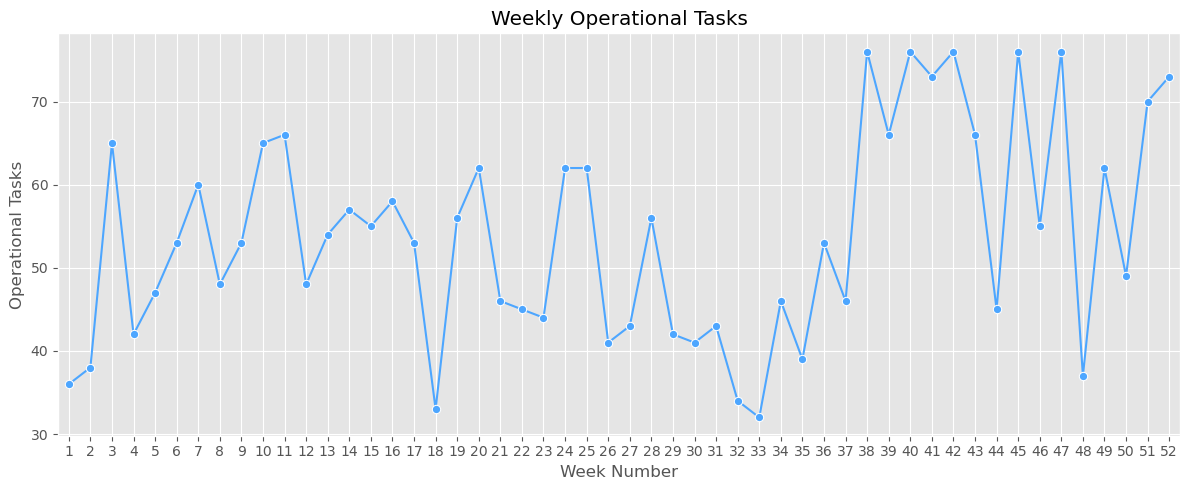

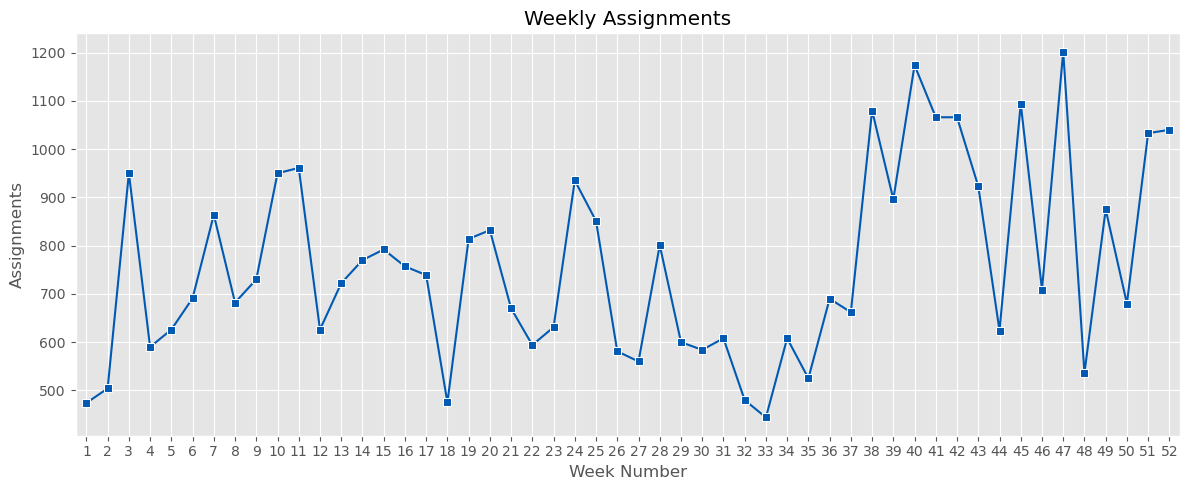

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# מיון לפי שבוע
weeks_df_sorted = weeks_df.sort_values('שבוע')
week_numbers = weeks_df_sorted['שבוע']

# -------------------
# גרף ראשון – Operational Tasks
# -------------------
plt.figure(figsize=(12, 5))
sns.lineplot(
    x=week_numbers,
    y=weeks_df_sorted['כמות פ״מים'],
    color='#4da6ff',
    marker='o'
)
plt.title('Weekly Operational Tasks')
plt.xlabel('Week Number')
plt.ylabel('Operational Tasks')
plt.xticks(ticks=week_numbers)
plt.xlim(0.5, 52.5)
plt.grid(True)
plt.tight_layout()

# שמירה
plt.savefig('operational_tasks.png', dpi=300)
plt.show()  # סוגר את הפיגור כדי לא לצבור גרפים

# -------------------
# גרף שני – Assignments
# -------------------
plt.figure(figsize=(12, 5))
sns.lineplot(
    x=week_numbers,
    y=weeks_df_sorted['כמות שיבוצים'],
    color='#0059b3',
    marker='s'
)
plt.title('Weekly Assignments')
plt.xlabel('Week Number')
plt.ylabel('Assignments')
plt.xticks(ticks=week_numbers)
plt.xlim(0.5, 52.5)
plt.grid(True)
plt.tight_layout()

# שמירה
plt.savefig('assignments.png', dpi=300)
plt.show()

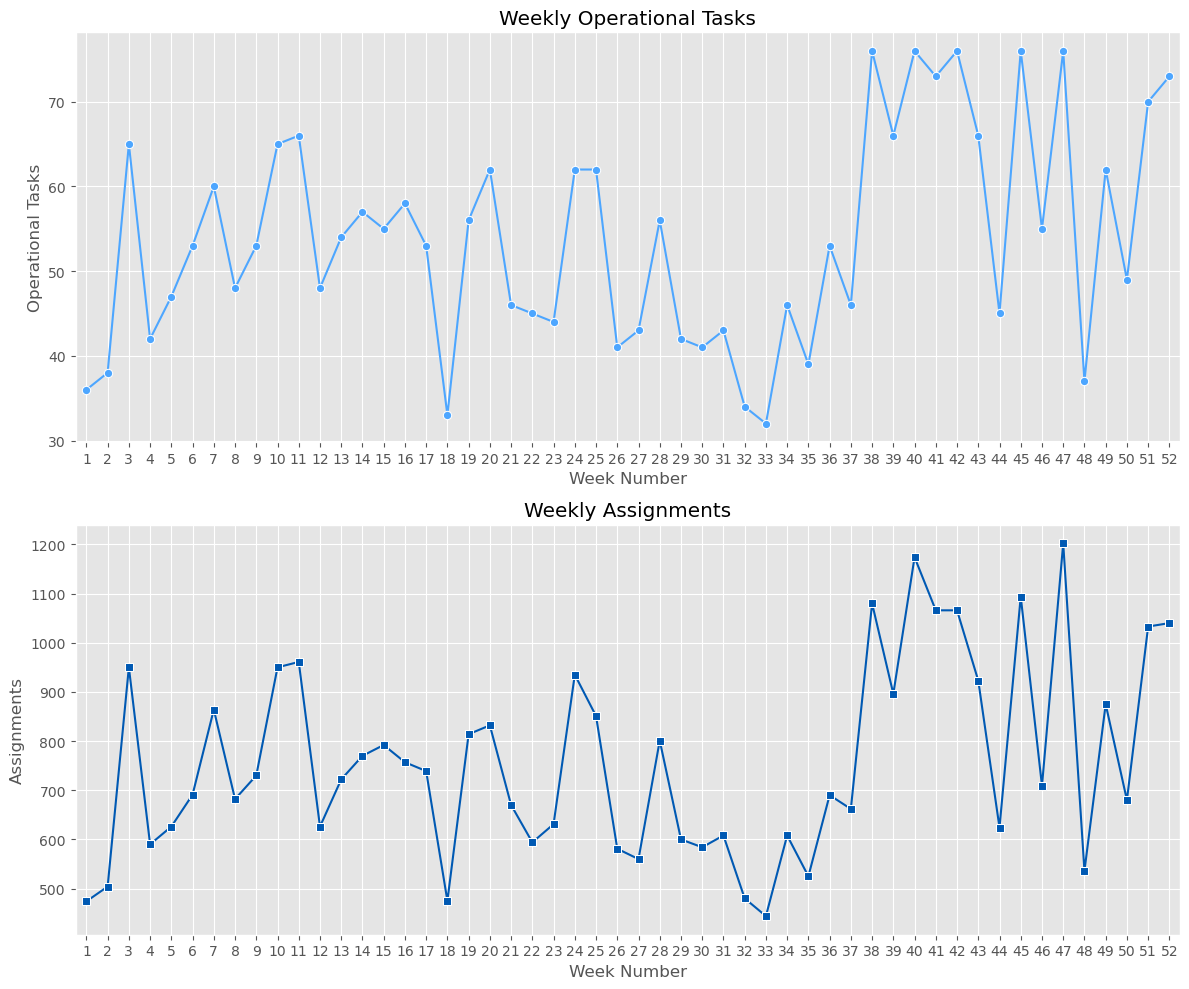

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# סגנון גרפים
plt.style.use("ggplot")

# מיון לפי שבוע
weeks_df_sorted = weeks_df.sort_values('שבוע')
week_numbers = weeks_df_sorted['שבוע']

# יצירת פיגור עם שני גרפים – אחד מעל השני
fig, axes = plt.subplots(2, 1, figsize=(12, 10))  # 2 שורות, גרף בכל שורה

# גרף ראשון – Weekly Operational Tasks
sns.lineplot(
    ax=axes[0],
    x=week_numbers,
    y=weeks_df_sorted['כמות פ״מים'],
    color='#4da6ff',
    marker='o'
)
axes[0].set_title('Weekly Operational Tasks')
axes[0].set_xlabel('Week Number')
axes[0].set_ylabel('Operational Tasks')
axes[0].set_xticks(week_numbers)
axes[0].set_xlim(0.5, 52.5)
axes[0].grid(True)

# גרף שני – Weekly Assignments
sns.lineplot(
    ax=axes[1],
    x=week_numbers,
    y=weeks_df_sorted['כמות שיבוצים'],
    color='#0059b3',
    marker='s'
)
axes[1].set_title('Weekly Assignments')
axes[1].set_xlabel('Week Number')
axes[1].set_ylabel('Assignments')
axes[1].set_xticks(week_numbers)
axes[1].set_xlim(0.5, 52.5)
axes[1].grid(True)

# עימוד גרפים
plt.tight_layout()

# שמירה לקובץ אחד ב־PNG
plt.savefig('weekly_analysis.png', dpi=300)
plt.show()

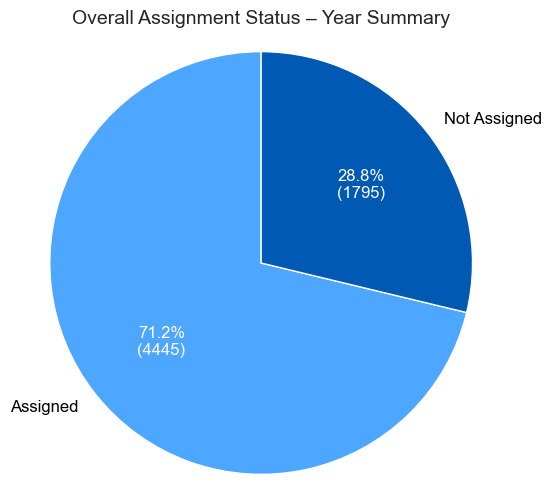

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# עיצוב כללי
sns.set_theme(style="whitegrid")

# נתונים
assigned = weeks_df['כמות אנשי צוות ששובצו'].sum()
not_assigned = weeks_df['כמות אנשי צוות שלא שובצו בכלל'].sum()
values = [assigned, not_assigned]
labels = ['Assigned', 'Not Assigned']
colors = ['#4da6ff', '#0059b3']

# פונקציית אחוז + כמות
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count})'

# ציור
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,  # הטקסט שמחוץ לפאי
    autopct=lambda pct: autopct_format(pct, values),  # הטקסט בתוך הפאי
    colors=colors,
    startangle=90,
    textprops=dict(color="black", fontsize=12)  # 🟦 טקסט מחוץ לפאי – שחור
)

# טקסט בתוך הפאי – לבן
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

# כותרת
plt.title('Overall Assignment Status – Year Summary', fontsize=14)
plt.axis('equal')  # שומר עיגול

# שמירה
plt.savefig('assignment_pie.png', dpi=300)
plt.show()

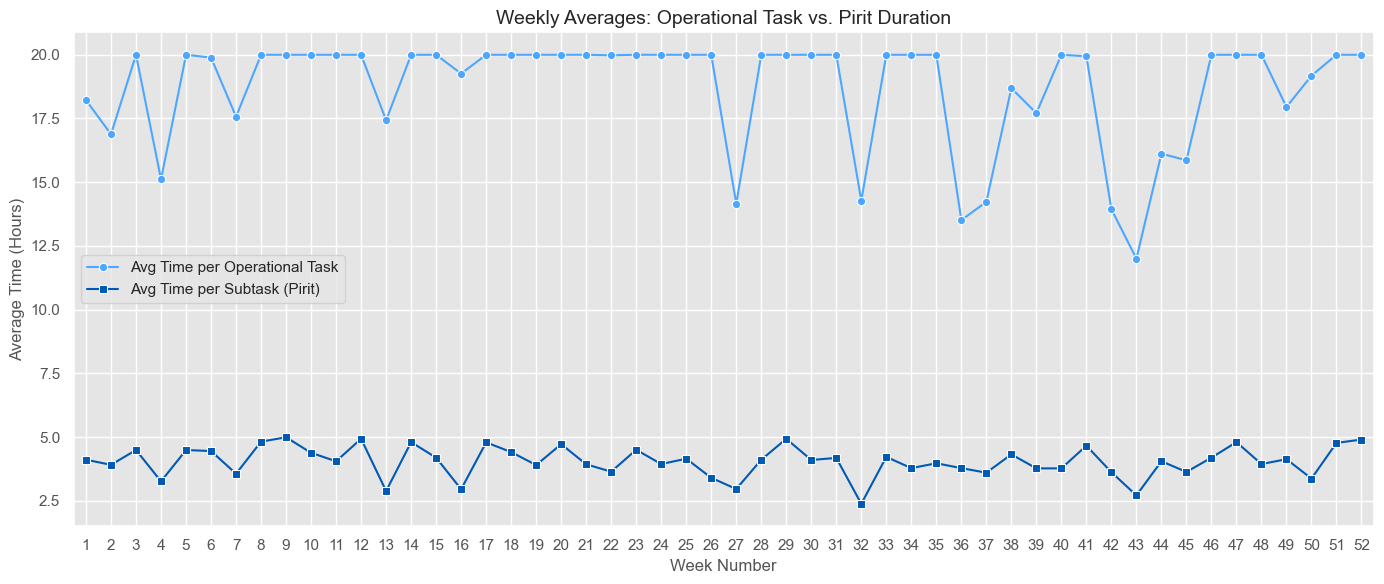

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# סגנון ggplot דרך matplotlib
plt.style.use('ggplot')
sns.set_theme(style=None)  # מנטרל את הסגנון של seaborn

# מיון לפי שבוע
weeks_df.columns = weeks_df.columns.str.strip()  # הסרת רווחים מעמודות
weeks_df_sorted = weeks_df.sort_values('שבוע')
week_numbers = weeks_df_sorted['שבוע']

# יצירת הגרף
plt.figure(figsize=(14, 6))

# קו ראשון – Operational Task
sns.lineplot(
    x=week_numbers,
    y=weeks_df_sorted['זמן ממוצע של פ״מ'],
    label='Avg Time per Operational Task',
    color='#4da6ff',
    marker='o'
)

# קו שני – Pirit
sns.lineplot(
    x=week_numbers,
    y=weeks_df_sorted['משך ממוצע לפיריט'],
    label='Avg Time per Subtask (Pirit)',
    color='#0059b3',
    marker='s'
)

# עיצוב גרף
plt.title('Weekly Averages: Operational Task vs. Pirit Duration', fontsize=14)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Average Time (Hours)', fontsize=12)
plt.xticks(ticks=week_numbers)
plt.xlim(0.5, 52.5)
plt.grid(True)
plt.legend()
plt.tight_layout()

# 💾 שמירה כקובץ PNG
plt.savefig('weekly_avg_plot.png', dpi=300)

# הצגת הגרף
plt.show()

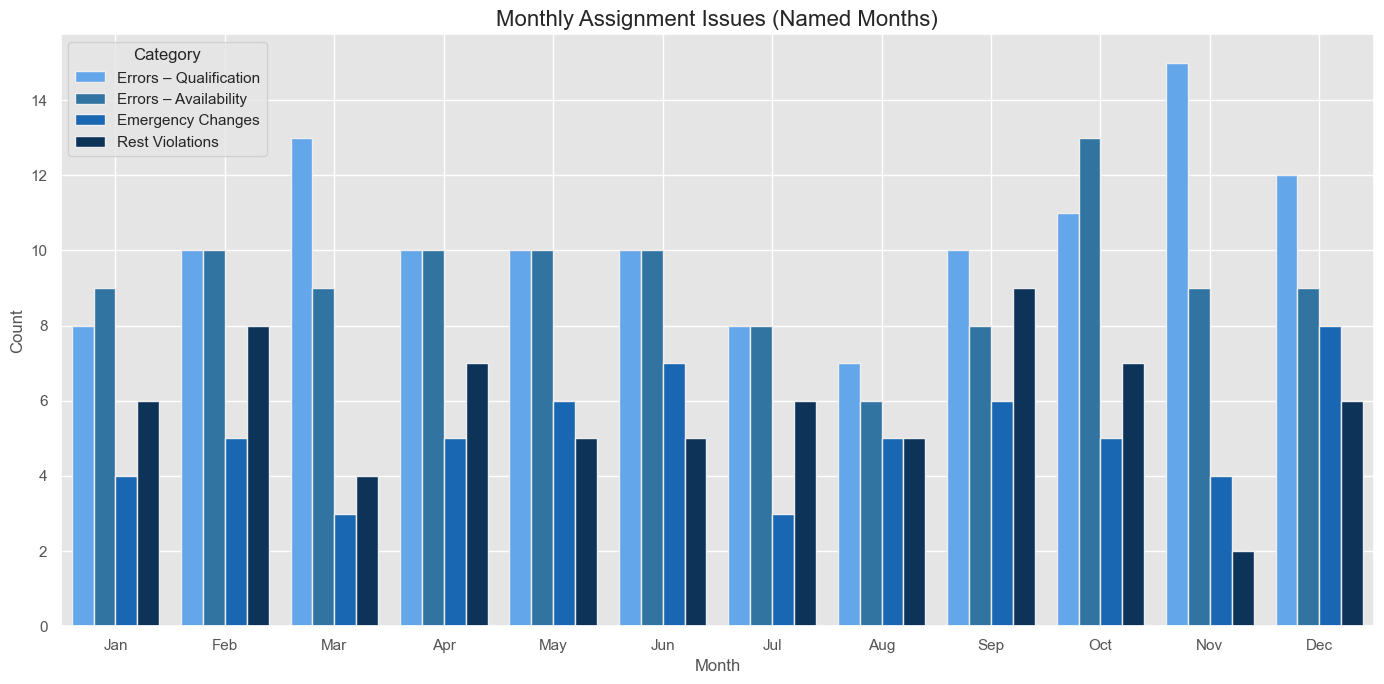

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ניקוי שמות עמודות
months_df.columns = months_df.columns.str.strip()

# מיפוי מספר לחודש
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# יצירת עותק עם רק העמודות הרצויות
monthly_plot_df = months_df[['חודש',
                             'כמות שיבוצים שגויים (כשירות)',
                             'כמות שיבוצים שגויים (זמינות)',
                             'כמות שינוי שיבוץ שנבעו מבלת"מ',
                             'כמות שיבוצים שחרגו משעות מנוחה']].copy()

# מיפוי לשם חודש
monthly_plot_df['Month'] = monthly_plot_df['חודש'].map(month_names)

# מחיקה של העמודה 'חודש' בעברית כדי שלא תיכנס בטעות ל־melt
monthly_plot_df = monthly_plot_df.drop(columns='חודש')

# שינוי שמות לעברית-אנגלית
monthly_plot_df = monthly_plot_df.rename(columns={
    'כמות שיבוצים שגויים (כשירות)': 'Errors – Qualification',
    'כמות שיבוצים שגויים (זמינות)': 'Errors – Availability',
    'כמות שינוי שיבוץ שנבעו מבלת"מ': 'Emergency Changes',
    'כמות שיבוצים שחרגו משעות מנוחה': 'Rest Violations'
})

# המרה ל־long format
monthly_long_df = monthly_plot_df.melt(id_vars='Month',
                                       var_name='Category',
                                       value_name='Count')

# שמירה על סדר נכון של חודשים
ordered_months = list(month_names.values())
monthly_long_df['Month'] = pd.Categorical(monthly_long_df['Month'],
                                          categories=ordered_months,
                                          ordered=True)

# צבעים בגווני כחול
blue_palette = ['#4da6ff', '#1f78b4', '#0066cc', '#003366']

# ציור הגרף
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_long_df, x='Month', y='Count', hue='Category', palette=blue_palette)

# עיצוב
plt.title('Monthly Assignment Issues (Named Months)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# שמירה
plt.savefig('monthly_issues_named_months_clean.png', dpi=300)
plt.show()

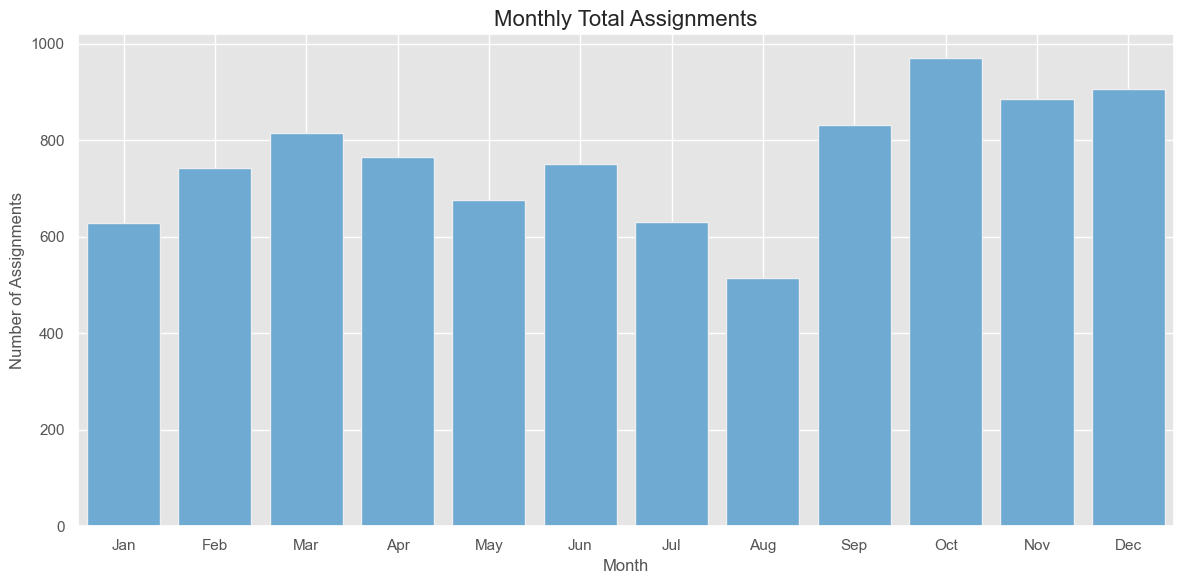

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ניקוי רווחים
months_df.columns = months_df.columns.str.strip()

# מיפוי מספר חודש לשם חודש
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# יצירת עותק רק עם הנתונים הרצויים
monthly_assignments_df = months_df[['חודש', 'כמות שיבוצים']].copy()
monthly_assignments_df['Month'] = monthly_assignments_df['חודש'].map(month_names)
monthly_assignments_df = monthly_assignments_df.drop(columns='חודש')

# שמירה על סדר חודשים
ordered_months = list(month_names.values())
monthly_assignments_df['Month'] = pd.Categorical(monthly_assignments_df['Month'],
                                                  categories=ordered_months,
                                                  ordered=True)

# ציור barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_assignments_df,
            x='Month',
            y='כמות שיבוצים',
            color='#5DADE2')

# עיצוב
plt.title('Monthly Total Assignments', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Assignments', fontsize=12)
plt.grid(True)
plt.tight_layout()

# שמירה לקובץ
plt.savefig('monthly_total_assignments.png', dpi=300)
plt.show()


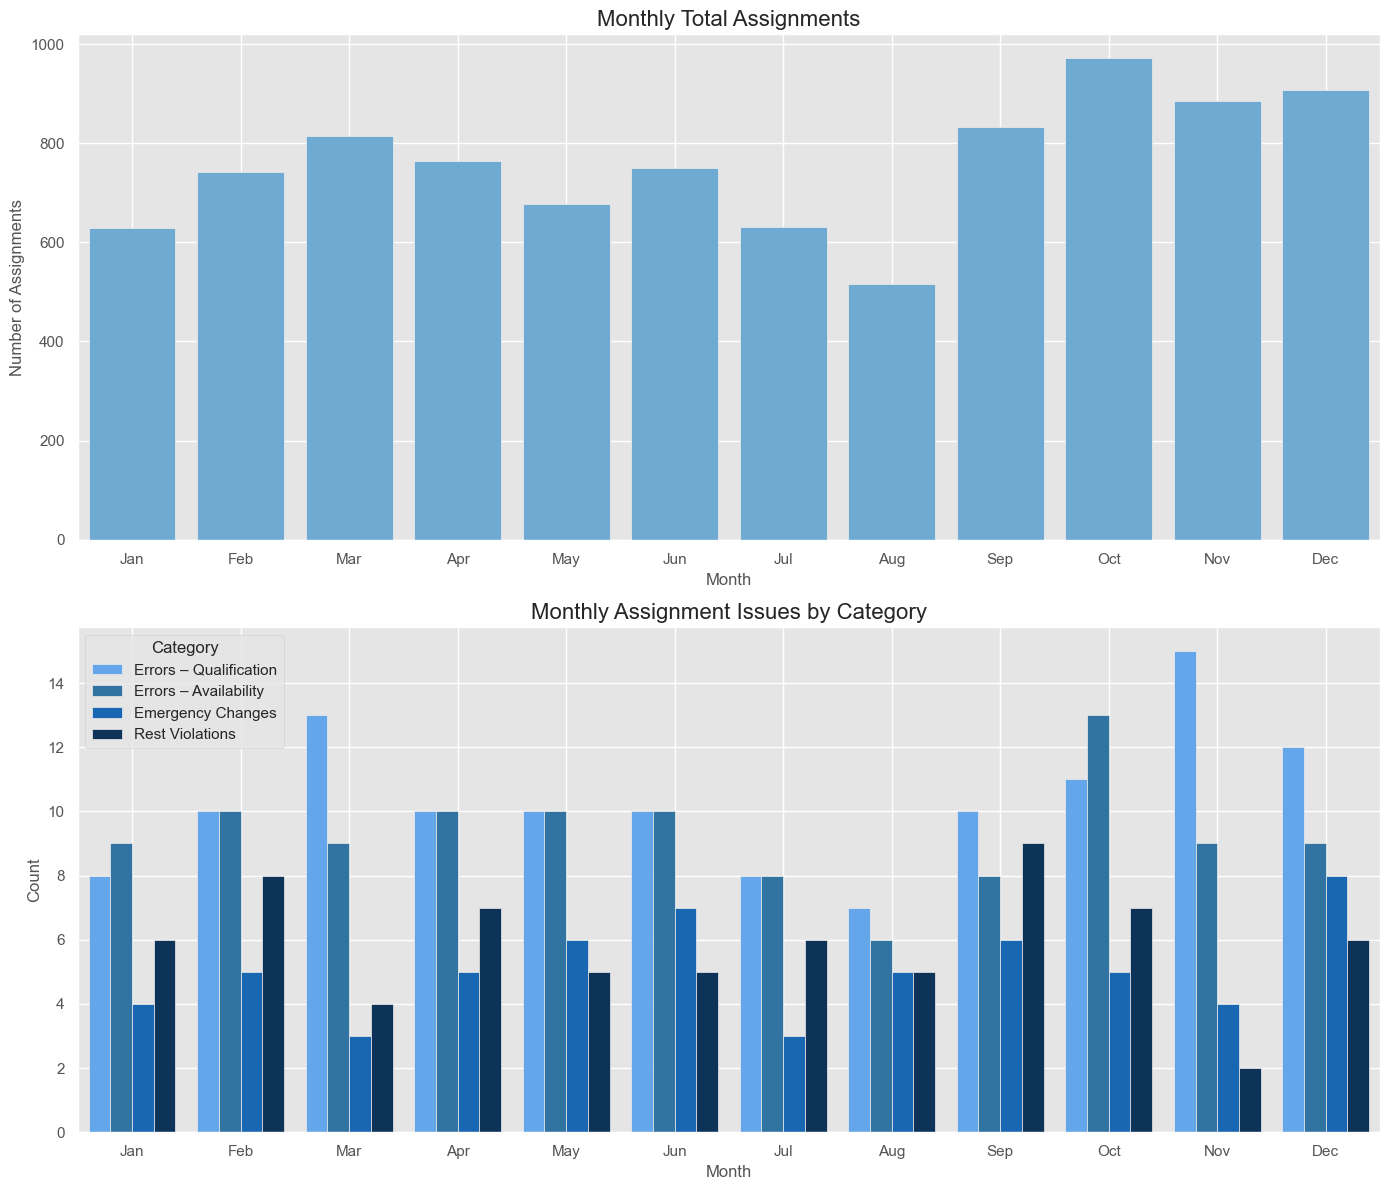

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# סגנון עיצוב
plt.style.use("ggplot")

# ניקוי רווחים
months_df.columns = months_df.columns.str.strip()

# מיפוי מספר חודש לשם חודש
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
ordered_months = list(month_names.values())

# ---------------------
# גרף ראשון – Total Assignments
# ---------------------
monthly_assignments_df = months_df[['חודש', 'כמות שיבוצים']].copy()
monthly_assignments_df['Month'] = monthly_assignments_df['חודש'].map(month_names)
monthly_assignments_df = monthly_assignments_df.drop(columns='חודש')
monthly_assignments_df['Month'] = pd.Categorical(monthly_assignments_df['Month'],
                                                  categories=ordered_months,
                                                  ordered=True)

# ---------------------
# גרף שני – Assignment Issues by Category
# ---------------------
monthly_plot_df = months_df[['חודש',
                             'כמות שיבוצים שגויים (כשירות)',
                             'כמות שיבוצים שגויים (זמינות)',
                             'כמות שינוי שיבוץ שנבעו מבלת"מ',
                             'כמות שיבוצים שחרגו משעות מנוחה']].copy()

monthly_plot_df['Month'] = monthly_plot_df['חודש'].map(month_names)
monthly_plot_df = monthly_plot_df.drop(columns='חודש')

monthly_plot_df = monthly_plot_df.rename(columns={
    'כמות שיבוצים שגויים (כשירות)': 'Errors – Qualification',
    'כמות שיבוצים שגויים (זמינות)': 'Errors – Availability',
    'כמות שינוי שיבוץ שנבעו מבלת"מ': 'Emergency Changes',
    'כמות שיבוצים שחרגו משעות מנוחה': 'Rest Violations'
})

monthly_long_df = monthly_plot_df.melt(id_vars='Month',
                                       var_name='Category',
                                       value_name='Count')
monthly_long_df['Month'] = pd.Categorical(monthly_long_df['Month'],
                                          categories=ordered_months,
                                          ordered=True)

# ---------------------
# ציור גרפים
# ---------------------
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# גרף 1 – Total Assignments
sns.barplot(ax=axes[0],
            data=monthly_assignments_df,
            x='Month',
            y='כמות שיבוצים',
            color='#5DADE2')
axes[0].set_title('Monthly Total Assignments', fontsize=16)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Assignments', fontsize=12)
axes[0].grid(True)

# גרף 2 – Assignment Issues
blue_palette = ['#4da6ff', '#1f78b4', '#0066cc', '#003366']
sns.barplot(ax=axes[1],
            data=monthly_long_df,
            x='Month',
            y='Count',
            hue='Category',
            palette=blue_palette)
axes[1].set_title('Monthly Assignment Issues by Category', fontsize=16)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Category')
axes[1].grid(True)

# עימוד ושמירה
plt.tight_layout()
plt.savefig('monthly_summary_combined.png', dpi=300)
plt.show()

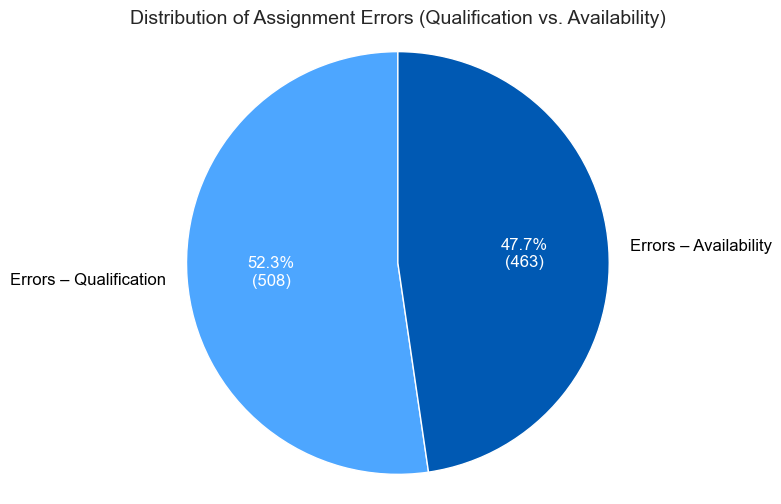

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# סגנון כללי
sns.set_theme(style="whitegrid")

# ניקוי רווחים בשמות עמודות
weeks_df.columns = weeks_df.columns.str.strip()

# סיכום הנתונים מכל השבועות
qualification_errors = weeks_df['כמות שיבוצים שגויים (כשירות)'].sum()
availability_errors = weeks_df['כמות שיבוצים שגויים (זמינות)'].sum()

# ערכים לגרף פאי
values = [qualification_errors, availability_errors]
labels = ['Errors – Qualification', 'Errors – Availability']
colors = ['#4da6ff', '#0059b3']

# פונקציה שמציגה גם אחוז וגם כמות מוחלטת
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count})'

# ציור גרף הפאי
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, values),
    colors=colors,
    startangle=90,
    textprops=dict(color='white', fontsize=12)
)

# עיצוב תגיות הקטגוריות בצבע שחור
for text in texts:
    text.set_color('black')
    text.set_fontsize(12)

# הוספת כותרת
plt.title('Distribution of Assignment Errors (Qualification vs. Availability)', fontsize=14)

# שמירה על פרופורציות עיגול
plt.axis('equal')

# שמירה לקובץ עם שוליים מתאימים (למניעת חיתוך)
plt.savefig('weekly_assignment_errors_pie.png', dpi=300, bbox_inches='tight')

# הצגת התרשים במסך
plt.show()

C:\Users\firem\AppData\Local\Temp\ipykernel_14684\3894078077.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weeks_df['Month'] = pd.to_datetime(weeks_df['מתאריך']).dt.month


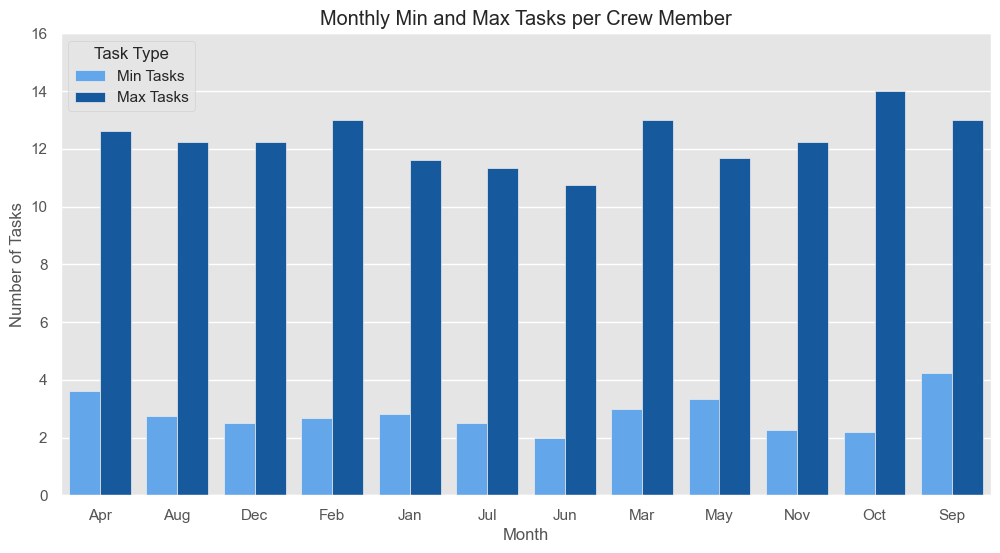

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# סגנון רקע
plt.style.use('ggplot')

# הנחה: weeks_df קיים וכולל את העמודות המתאימות
weeks_df['Month'] = pd.to_datetime(weeks_df['מתאריך']).dt.month
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weeks_df['Month Name'] = weeks_df['Month'].map(month_names)

# חישוב ממוצע חודשי
monthly_minmax_df = weeks_df.groupby('Month Name', observed=True).agg({
    'מינימום משימות לאיש צוות (ששובצו)': 'mean',
    'מקס משימות לאיש צוות': 'mean'
}).reset_index()

# המרה לפורמט ארוך
monthly_minmax_df = monthly_minmax_df.melt(
    id_vars='Month Name',
    value_vars=['מינימום משימות לאיש צוות (ששובצו)', 'מקס משימות לאיש צוות'],
    var_name='Task Type',
    value_name='Tasks'
)

# תרגום שמות
monthly_minmax_df['Task Type'] = monthly_minmax_df['Task Type'].replace({
    'מינימום משימות לאיש צוות (ששובצו)': 'Min Tasks',
    'מקס משימות לאיש צוות': 'Max Tasks'
})

# ציור הגרף עם הצבעים החדשים
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=monthly_minmax_df,
    x='Month Name',
    y='Tasks',
    hue='Task Type',
    palette=['#4da6ff', '#0059b3'],  # הצבעים החדשים
    ax=ax
)

# עיצוב
plt.title('Monthly Min and Max Tasks per Crew Member')
plt.ylabel('Number of Tasks')
plt.xlabel('Month')
plt.ylim(0, monthly_minmax_df['Tasks'].max() + 2)
plt.legend(title='Task Type', loc='upper left')

# שמירה לקובץ PNG
plt.savefig("monthly_min_max_tasks_final.png", dpi=300, bbox_inches='tight')
plt.show()

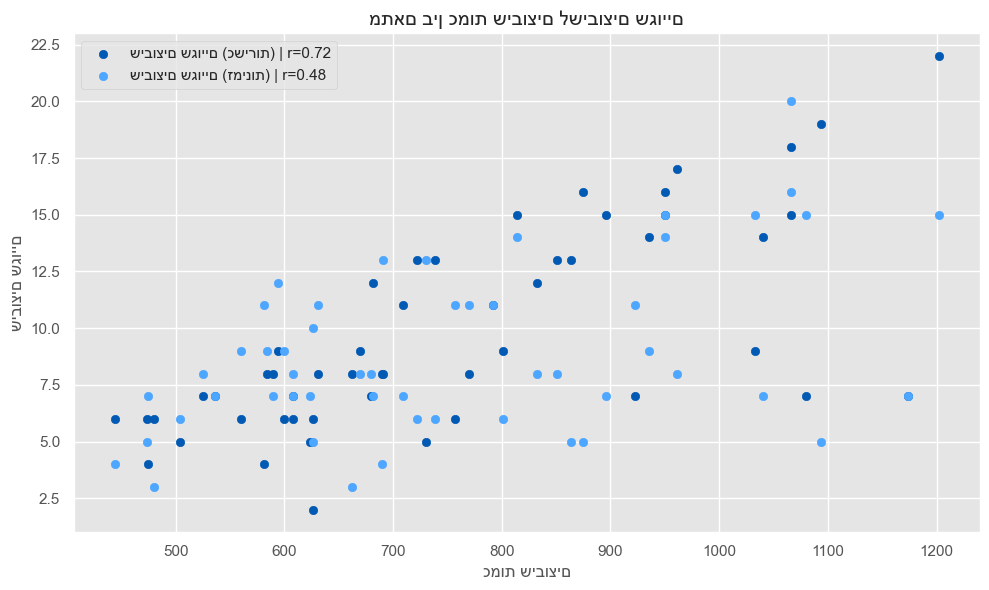

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# סגנון ggplot
plt.style.use("ggplot")

# משתנים
x = weeks_df['כמות שיבוצים']
y1 = weeks_df['כמות שיבוצים שגויים (כשירות)']
y2 = weeks_df['כמות שיבוצים שגויים (זמינות)']

# חישוב מתאם פירסון
corr1, _ = pearsonr(x, y1)
corr2, _ = pearsonr(x, y2)

# ציור הגרף
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, label=f'שיבוצים שגויים (כשירות) | r={corr1:.2f}', color='#0059b3')
plt.scatter(x, y2, label=f'שיבוצים שגויים (זמינות) | r={corr2:.2f}', color='#4da6ff')
plt.title('מתאם בין כמות שיבוצים לשיבוצים שגויים')
plt.xlabel('כמות שיבוצים')
plt.ylabel('שיבוצים שגויים')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

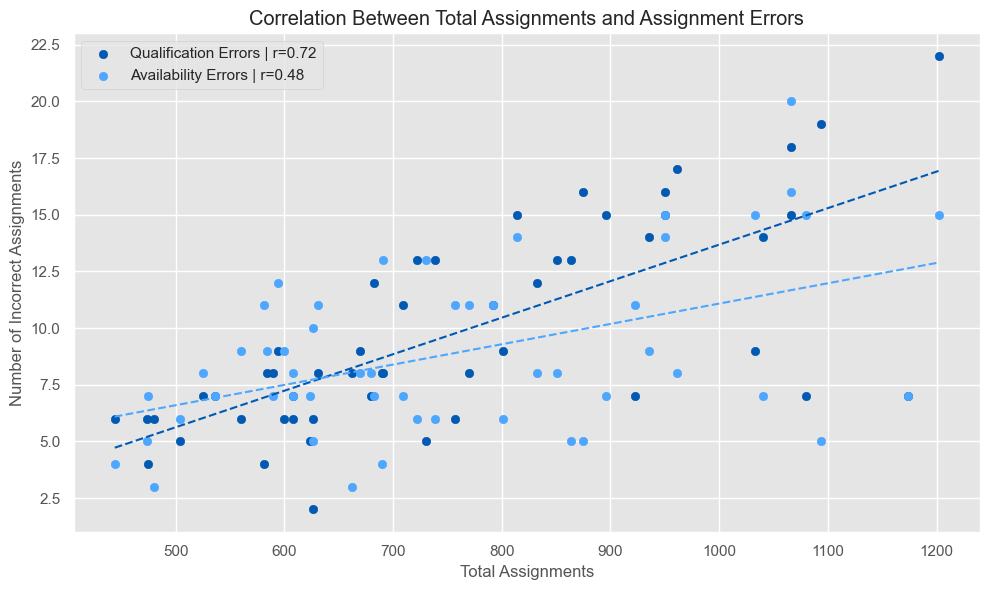

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
import numpy as np

# Set ggplot style
plt.style.use("ggplot")

# Copy and rename columns to English for clarity
df = weeks_df.rename(columns={
    'כמות שיבוצים': 'Total Assignments',
    'כמות שיבוצים שגויים (כשירות)': 'Incorrect Assignments (Qualification)',
    'כמות שיבוצים שגויים (זמינות)': 'Incorrect Assignments (Availability)'
})

# Variables
x = df['Total Assignments']
y1 = df['Incorrect Assignments (Qualification)']
y2 = df['Incorrect Assignments (Availability)']

# Pearson correlation
corr1, _ = pearsonr(x, y1)
corr2, _ = pearsonr(x, y2)

# Linear regression
slope1, intercept1, *_ = linregress(x, y1)
slope2, intercept2, *_ = linregress(x, y2)
x_vals = np.linspace(x.min(), x.max(), 100)
y1_fit = slope1 * x_vals + intercept1
y2_fit = slope2 * x_vals + intercept2

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, color='#0059b3', label=f'Qualification Errors | r={corr1:.2f}')
plt.plot(x_vals, y1_fit, color='#0059b3', linestyle='--')

plt.scatter(x, y2, color='#4da6ff', label=f'Availability Errors | r={corr2:.2f}')
plt.plot(x_vals, y2_fit, color='#4da6ff', linestyle='--')

plt.title('Correlation Between Total Assignments and Assignment Errors')
plt.xlabel('Total Assignments')
plt.ylabel('Number of Incorrect Assignments')
plt.legend()
plt.tight_layout()
plt.savefig("qualification_availability_errors_correlation.png", dpi=300)
plt.show()

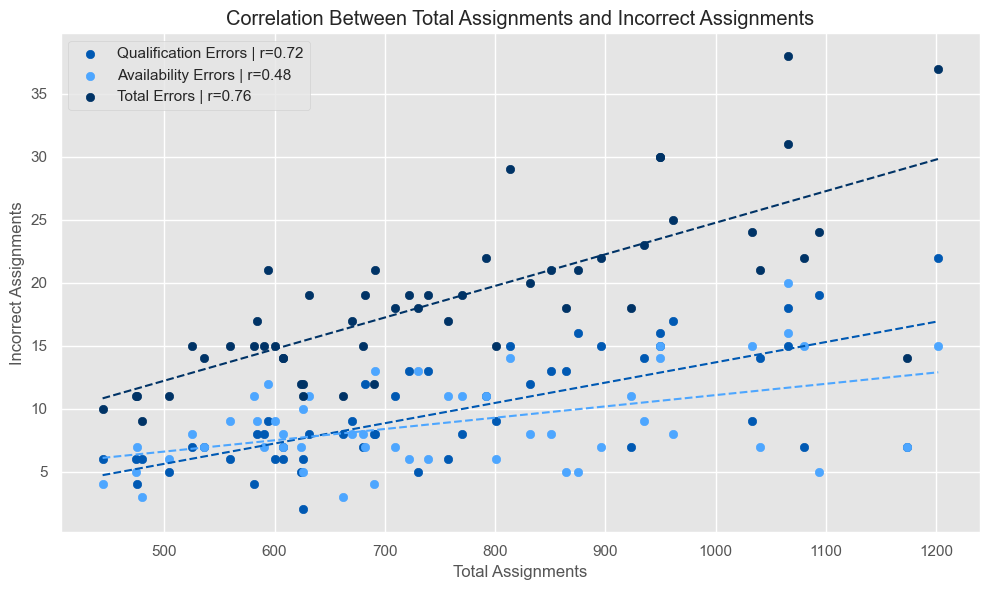

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
import numpy as np

# Use ggplot style
plt.style.use("ggplot")

# Rename columns for clarity
df = weeks_df.rename(columns={
    'כמות שיבוצים': 'Total Assignments',
    'כמות שיבוצים שגויים (כשירות)': 'Incorrect Assignments (Qualification)',
    'כמות שיבוצים שגויים (זמינות)': 'Incorrect Assignments (Availability)'
})

# Add combined column
df['Incorrect Assignments (Total)'] = df['Incorrect Assignments (Qualification)'] + df['Incorrect Assignments (Availability)']

# Variables
x = df['Total Assignments']
y1 = df['Incorrect Assignments (Qualification)']
y2 = df['Incorrect Assignments (Availability)']
y3 = df['Incorrect Assignments (Total)']

# Correlations
corr1, _ = pearsonr(x, y1)
corr2, _ = pearsonr(x, y2)
corr3, _ = pearsonr(x, y3)

# Regressions
def regression_line(y):
    slope, intercept, *_ = linregress(x, y)
    return slope * x_vals + intercept

x_vals = np.linspace(x.min(), x.max(), 100)
y1_fit = regression_line(y1)
y2_fit = regression_line(y2)
y3_fit = regression_line(y3)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, color='#0059b3', label=f'Qualification Errors | r={corr1:.2f}')
plt.plot(x_vals, y1_fit, color='#0059b3', linestyle='--')

plt.scatter(x, y2, color='#4da6ff', label=f'Availability Errors | r={corr2:.2f}')
plt.plot(x_vals, y2_fit, color='#4da6ff', linestyle='--')

plt.scatter(x, y3, color='#003366', label=f'Total Errors | r={corr3:.2f}')
plt.plot(x_vals, y3_fit, color='#003366', linestyle='--')

plt.title('Correlation Between Total Assignments and Incorrect Assignments')
plt.xlabel('Total Assignments')
plt.ylabel('Incorrect Assignments')
plt.legend()
plt.tight_layout()
plt.savefig("assignment_errors_correlation.png", dpi=300)
plt.show()

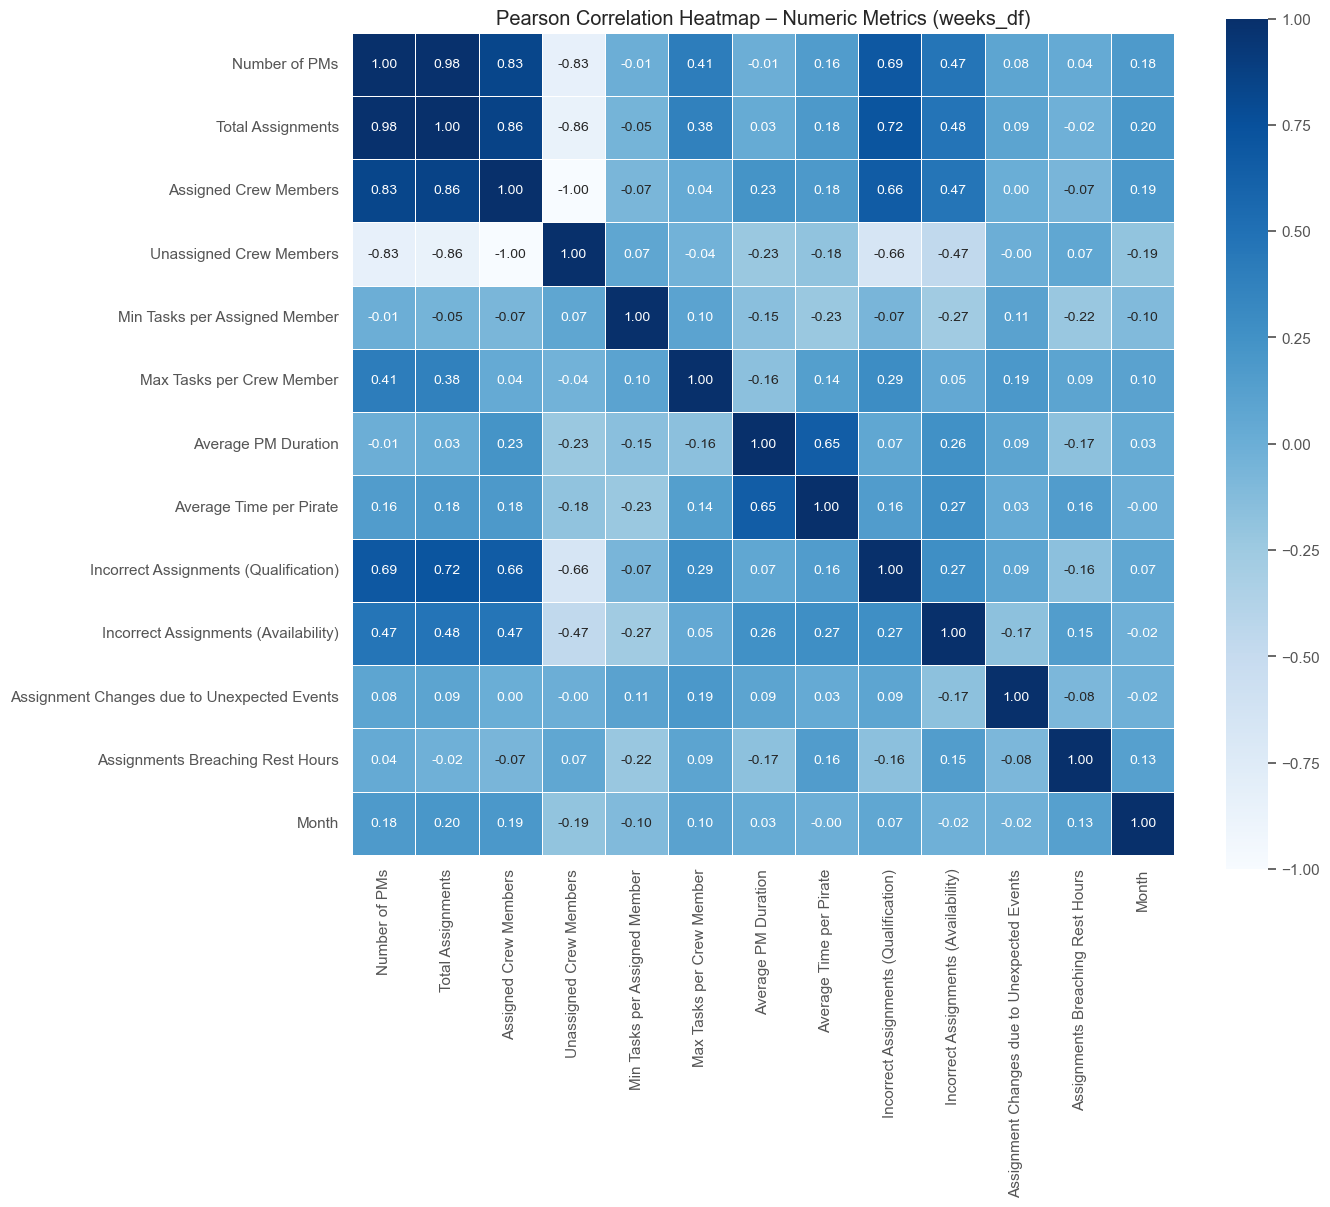

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set ggplot style
plt.style.use("ggplot")

# Rename Hebrew columns to English
df = weeks_df.rename(columns={
    'שבוע': 'Week',
    'מתאריך': 'From Date',
    'עד תאריך': 'To Date',
    'כמות פ״מים': 'Number of PMs',
    'כמות שיבוצים': 'Total Assignments',
    'כמות אנשי צוות ששובצו': 'Assigned Crew Members',
    'כמות אנשי צוות שלא שובצו בכלל': 'Unassigned Crew Members',
    'מינימום משימות לאיש צוות (ששובצו)': 'Min Tasks per Assigned Member',
    'מקס משימות לאיש צוות': 'Max Tasks per Crew Member',
    'זמן ממוצע של פ״מ': 'Average PM Duration',
    'משך ממוצע לפיריט': 'Average Time per Pirate',
    'כמות שיבוצים שגויים (כשירות)': 'Incorrect Assignments (Qualification)',
    'כמות שיבוצים שגויים (זמינות)': 'Incorrect Assignments (Availability)',
    'כמות שינוי שיבוץ שנבעו מבלת"מ': 'Assignment Changes due to Unexpected Events',
    'כמות שיבוצים שחרגו משעות מנוחה': 'Assignments Breaching Rest Hours'
})

# Drop non-numeric columns
df_filtered = df.drop(columns=['Week', 'From Date', 'To Date'])

# Select only numeric columns
df_numeric = df_filtered.select_dtypes(include='number')

# Compute Pearson correlation matrix
corr_matrix = df_numeric.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, square=True)
plt.title("Pearson Correlation Heatmap – Numeric Metrics (weeks_df)")
plt.tight_layout()

# Save the heatmap as PNG
plt.savefig("weeks_df_pearson_heatmap_translated.png", dpi=300)
plt.show()